In [224]:
import cv2
#Libreria Numpy
import numpy as np
#Libreria de opciones de sistema
import os
#Dar importancia de mensajes
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 
import shutil
from sklearn.decomposition import PCA
import glob
#Importar pandas
import pandas as pd
#Importar librerias graficas
import matplotlib.pyplot as plt
from  PIL  import Image
#Importar librerias de analisis
import seaborn as sn
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import array_to_img, img_to_array, load_img
from rembg import remove
from sklearn.preprocessing import MinMaxScaler
import h5py
#Importar libreria de tiempo
from time import sleep
#Importo libreria para divirvir el set
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
import os
import cv2
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from tensorflow import keras
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout
from tensorflow.keras.layers import BatchNormalization
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.decomposition import PCA
print("Loaded all libraries")

Loaded all libraries


## Carga de Datos y Exploracion

In [225]:
root_path = os.path.abspath('.')
print(root_path)
#Obtener ruta de carpeta con imagenes
fpath =root_path+"/Class_Dataset_RemovedBG"
#Permite Generar numeros aleatorios
random_seed = 42
#Obtengo las clases de las carpetas
categories = os.listdir(fpath)
#Defino un numero maximo de categorias
categories = categories[:20]
#Imprimo la lista de categorias y el numero
print("List of categories = ",categories,"\n\nNo. of categories = ", len(categories))

c:\Users\VINICIO BORJA\Desktop\IA\Unidad3\Borja_Lab1\ProyectoVinicioMajo
List of categories =  ['ArielChabla', 'ArroboMercy', 'CevallosJoan', 'EnriquezSelena', 'GenesisHeredia', 'GoyesAnthony', 'HectorCedeno', 'JhonZambrano', 'JordanEspinosa', 'JorgeBorrero', 'JoseRuiz', 'LucioCarlos', 'MasacheFernando', 'MelanyLopez', 'MosqueraLucy', 'NatalyAcosta', 'OlallaLuis', 'ParragaMariaJose', 'PauteKevin', 'RaymondDavila'] 

No. of categories =  20


In [226]:
#Exploro las imagenes y las etiquetas de clase de cada una de las categorias
def load_images_and_labels(categories):
    img_lst=[]
    labels=[]
    for index, category in enumerate(categories):
        for image_name in os.listdir(fpath+"/"+category):
            img = cv2.imread(fpath+"/"+category+"/"+image_name)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            img_array = Image.fromarray(img, 'RGB')
            
            #REDIMENSIONO las imagenes ya que 227 es la con la dimension que usa AlexNet
            resized_img = img_array.resize((227, 227))
            
            img_lst.append(np.array(resized_img))
            
            labels.append(index)
    return img_lst, labels

#Indico el numero de imagenes cargadas y de igual forma la etiqueta que tiene

images, labels = load_images_and_labels(categories)
print("No. of images loaded = ",len(images),"\nNo. of labels loaded = ",len(labels))
print(type(images),type(labels))

No. of images loaded =  1757 
No. of labels loaded =  1757
<class 'list'> <class 'list'>


In [227]:
#Genero un arreglo tanto de las imagenes como de las etiquetas
images = np.array(images)
labels = np.array(labels)
#Imprimo el tamaño de las imagenes y de las etiquetas
print("Images shape = ",images.shape,"\nLabels shape = ",labels.shape)
print(type(images),type(labels))

Images shape =  (1757, 227, 227, 3) 
Labels shape =  (1757,)
<class 'numpy.ndarray'> <class 'numpy.ndarray'>


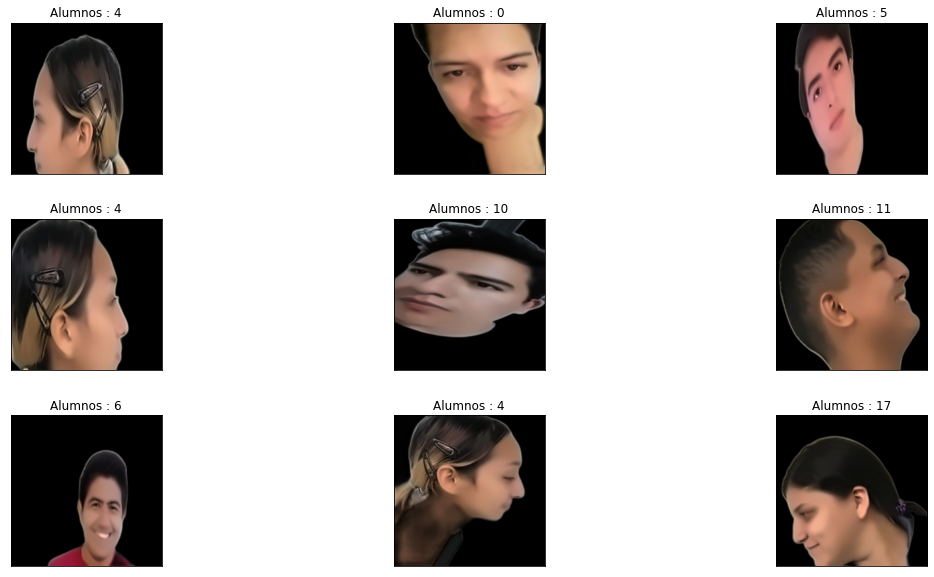

In [228]:
#Muestro magenes randomicas en las cuales se muestre tanto la imagen con la etiqueta que tiene
def display_rand_images(images, labels):
    plt.figure(1 , figsize = (19 , 10))
    n = 0 
    for i in range(9):
        n += 1 
        r = np.random.randint(0 , images.shape[0] , 1)
        
        plt.subplot(3 , 3 , n)
        plt.subplots_adjust(hspace = 0.3 , wspace = 0.3)
        plt.imshow(images[r[0]])
        
        plt.title('Alumnos : {}'.format(labels[r[0]]))
        plt.xticks([])
        plt.yticks([])
        
    plt.show()
    
display_rand_images(images, labels)

In [229]:
#El paso n.º 1 en la reorganización de datos

#obtener números igualmente espaciados en un rango dado
n = np.arange(images.shape[0])
print("'n' values before shuffling = ",n)

#mezclar todos los valores igualmente espaciados en la lista 'n'
np.random.seed(random_seed)
np.random.shuffle(n)
print("\n'n' values after shuffling = ",n)

'n' values before shuffling =  [   0    1    2 ... 1754 1755 1756]

'n' values after shuffling =  [1125 1030 1449 ...  860 1459 1126]


## Preparo los datos para la CNN

In [230]:
#El paso n.º 2 en la reorganización de datos

#barajar las imágenes y los datos de las etiquetas correspondientes en ambas listas
images = images[n]
labels = labels[n]

print("Images shape after shuffling = ",images.shape,"\nLabels shape after shuffling = ",labels.shape)

Images shape after shuffling =  (1757, 227, 227, 3) 
Labels shape after shuffling =  (1757,)


In [231]:
#Se procede a hacer una normalizacion de las imagenes y de las etiquetas
images = images.astype(np.float32)
labels = labels.astype(np.int32)
images = images/255
print("Images shape after normalization = ",images.shape)

Images shape after normalization =  (1757, 227, 227, 3)


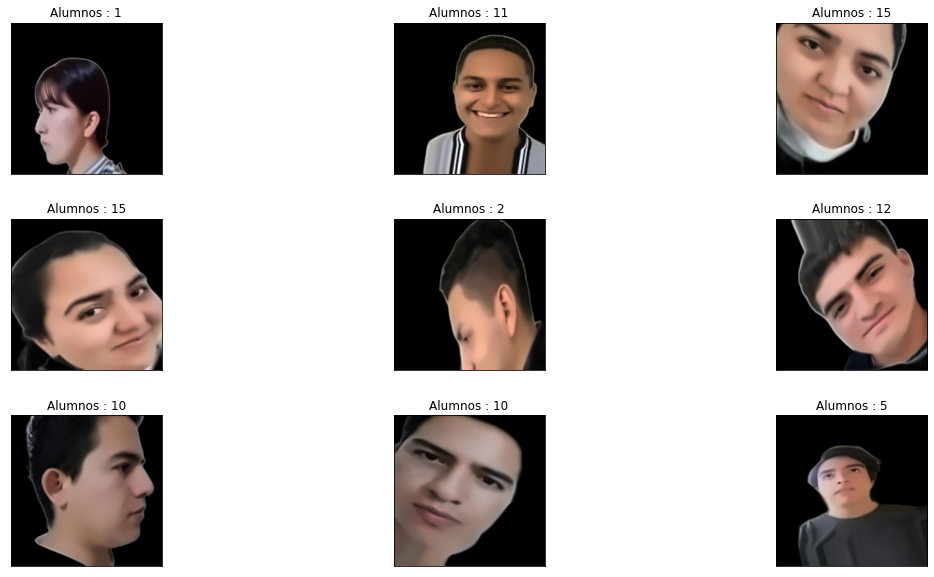

In [232]:
#Muestro imagenes random con sus etiquetas     ---------------------------------------------          1
display_rand_images(images, labels)

## Divido el Set de Entrenamiento y Prueba

In [233]:
#Divido mi set de datos en entrenamiento y prueba
train_ds, test_ds, train_labels, test_labels = train_test_split(images, labels, test_size = 0.2, random_state = random_seed)

#Muestro la dimension de cada uno de los sets
print("train_ds shape = ",train_ds.shape)
print("train_labels shape = ",train_labels.shape)
print("\ntest_ds shape = ",test_ds.shape)
print("test_labels shape = ",test_labels.shape)

train_ds shape =  (1405, 227, 227, 3)
train_labels shape =  (1405,)

test_ds shape =  (352, 227, 227, 3)
test_labels shape =  (352,)


In [234]:
train_ds.shape

(1405, 227, 227, 3)

In [235]:
test_ds.shape

(352, 227, 227, 3)

## Defino y entreno Modelo

In [236]:
#Diseño de la red convolucional de Alex Net en el cual se aprecia la arquitectura de AlexNet, mediante el uso de keras se puede generar
#capas de redes neuronales consecutivas
model=keras.models.Sequential([
    keras.layers.Conv2D(filters=128, kernel_size=(11,11), strides=(4,4), activation='relu', input_shape=(227,227,3)),#Implementación de la primera capa de convolucion
    keras.layers.BatchNormalization(), #Capa de Normalizacion para mitigar los efectos del gradiente estandarizando y normalizando los valores de entrada
    keras.layers.MaxPool2D(pool_size=(2,2)), #Capa de MaxPooling con una ventana de 2x2
    keras.layers.Conv2D(filters=256, kernel_size=(5,5), strides=(1,1), activation='relu', padding="same"),#Capa de Convolucion
    keras.layers.BatchNormalization(), #Capa de Normalizacion
    keras.layers.MaxPool2D(pool_size=(3,3)), #Capa de MaxPooling
    keras.layers.Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"), #Capa de Convolusion
    keras.layers.BatchNormalization(), #Capa de Normalizacion
    keras.layers.Conv2D(filters=256, kernel_size=(1,1), strides=(1,1), activation='relu', padding="same"),#Capa de Convolucion
    keras.layers.BatchNormalization(), #Capa de Normalizacion
    keras.layers.Conv2D(filters=256, kernel_size=(1,1), strides=(1,1), activation='relu', padding="same"), #Capa de Convolucion
    keras.layers.BatchNormalization(), #Capa de Normalizacion
    keras.layers.MaxPool2D(pool_size=(2,2)), #Capa de Max Pooling
    keras.layers.Flatten(), #Convierto a matriz unidimensional
    
    
    keras.layers.Dense(1024,activation='relu'), #Capa densa con diferenteres neuronas
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1024,activation='relu'), #Capa densa
    keras.layers.Dropout(0.5),
    keras.layers.Dense(25,activation='softmax')  #Capa densa
])

In [237]:
#Implemento la compilacion del modelo con la funcion de perdida, el algoritmo de optimizacion e incluyo la metrica que usare
model.compile(
    loss='sparse_categorical_crossentropy',
    #optimizer=tf.optimizers.SGD(lr=0.001),
    optimizer='adam',
    metrics=['accuracy']    
)

In [238]:
"""Usando EarlyStopping para mayor acurrancy"""
#|||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||
#Patience es el numero de iteraciones que se espera que el valor de la funcion de perdida no cambie 
# antes de parar el entrenamiento y continuar con el siguiente epoch
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=200) 

##  Applying PCA


In [239]:
# train_ds1 = (train_ds.reshape(train_ds.shape[0], train_ds.shape[1] * train_ds.shape[2] * train_ds.shape[3]))
# test_ds1 = (test_ds.reshape(test_ds.shape[0], test_ds.shape[1] * test_ds.shape[2] * test_ds.shape[3]))

In [240]:
# pca = PCA(n_components = 19)
# pca.fit(train_ds1)
# train_ds1 = pca.transform(train_ds1)
# test_ds1 = pca.transform(test_ds1)

# print(train_ds1.shape, test_ds1.shape)

In [241]:
#Entrego un resumen de mi modelo que indica la composicion de cada capa
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_45 (Conv2D)           (None, 55, 55, 128)       46592     
_________________________________________________________________
batch_normalization_45 (Batc (None, 55, 55, 128)       512       
_________________________________________________________________
max_pooling2d_27 (MaxPooling (None, 27, 27, 128)       0         
_________________________________________________________________
conv2d_46 (Conv2D)           (None, 27, 27, 256)       819456    
_________________________________________________________________
batch_normalization_46 (Batc (None, 27, 27, 256)       1024      
_________________________________________________________________
max_pooling2d_28 (MaxPooling (None, 9, 9, 256)         0         
_________________________________________________________________
conv2d_47 (Conv2D)           (None, 9, 9, 256)        

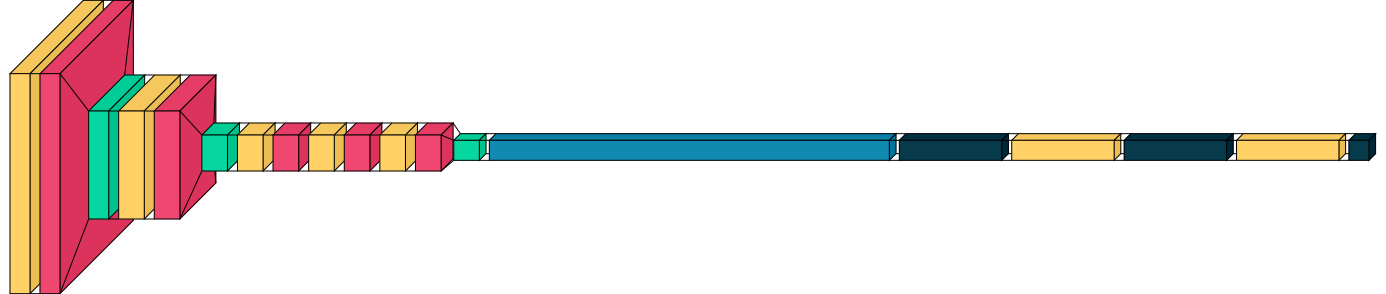

In [251]:
import visualkeras
visualkeras.layered_view(model)

In [242]:
#Proceso de entrenamiento de la red
from gc import callbacks
history = model.fit(train_ds, train_labels, epochs=70, validation_split=0.2, batch_size=32,callbacks=[es])

Epoch 1/70
36/36 [==============================] - 56s 2s/step - loss: 4.2803 - accuracy: 0.0854 - val_loss: 3.8319 - val_accuracy: 0.0747
Epoch 2/70
36/36 [==============================] - 47s 1s/step - loss: 2.9421 - accuracy: 0.1441 - val_loss: 3.0524 - val_accuracy: 0.0890
Epoch 3/70
36/36 [==============================] - 37s 1s/step - loss: 2.6879 - accuracy: 0.1957 - val_loss: 2.9745 - val_accuracy: 0.1068
Epoch 4/70
36/36 [==============================] - 39s 1s/step - loss: 2.5647 - accuracy: 0.2482 - val_loss: 2.7069 - val_accuracy: 0.1530
Epoch 5/70
36/36 [==============================] - 34s 955ms/step - loss: 2.4436 - accuracy: 0.2447 - val_loss: 3.1286 - val_accuracy: 0.1210
Epoch 6/70
36/36 [==============================] - 33s 915ms/step - loss: 2.3305 - accuracy: 0.2972 - val_loss: 2.5990 - val_accuracy: 0.2171
Epoch 7/70
36/36 [==============================] - 37s 1s/step - loss: 2.2619 - accuracy: 0.3194 - val_loss: 2.3922 - val_accuracy: 0.2918
Epoch 8/70
36/

## Pruebas en el Modelo

In [244]:
#Encuentro las metricas que he guardado
model.history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

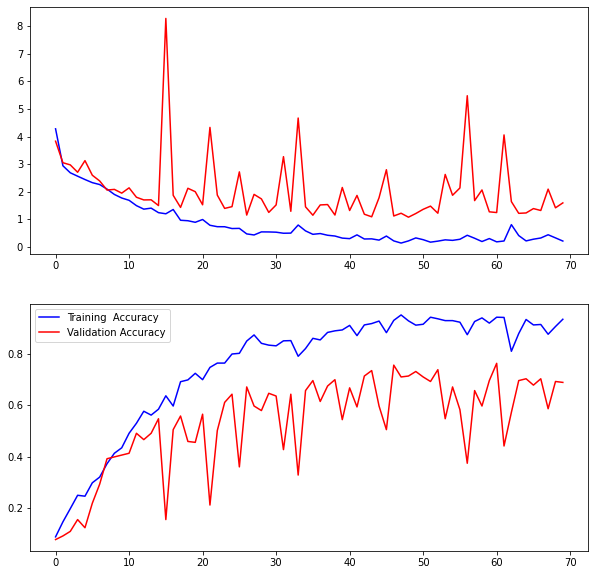

In [245]:
#Visualizo el entrenbamiento a traves de las epocas
f,ax=plt.subplots(2,1,figsize=(10,10)) 
#Asignación de la primera graficacpara graficar la pérdida en el entrenamiento y en la  validación
ax[0].plot(model.history.history['loss'],color='b',label='Training Loss')
ax[0].plot(model.history.history['val_loss'],color='r',label='Validation Loss')
#Trazado de la precisión del entrenamiento y la precisión de la validación
ax[1].plot(model.history.history['accuracy'],color='b',label='Training  Accuracy')
ax[1].plot(model.history.history['val_accuracy'],color='r',label='Validation Accuracy')
plt.legend()

In [246]:
#Imprimo el accuracy de mi modelo
print('Accuracy Score = ',np.max(history.history['val_accuracy']))

Accuracy Score =  0.7651245594024658


In [247]:
#Obtengo medidas de prediccion del modelo
model_probs = model.predict(test_ds, verbose=0)
# Predecir clases para el conjunto de prueba
model_classes = np.argmax(model_probs,axis=1)
# Reducir a un array de 1D
model_probs = model_probs[:, 0]
 
# accuracy: (tp + tn) / (p + n) encuentro el accuracy del modelo
accuracy = accuracy_score(test_labels, model_classes)*100
# precision tp / (tp + fp) encuentro la precision del modelo
precision = precision_score(test_labels, model_classes, average='weighted')*100
# recall: tp / (tp + fn) analizo el recall del modelo
recall = recall_score(test_labels, model_classes, average='weighted')*100
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(test_labels, model_classes, average='weighted')*100

#Imprimo los valores -- Metricas de prediccion del modelo
print('Accuracy: %.2f' % accuracy)
print('F1 score: %.2f' % f1)
print('Precision: %.2f' % precision)
print('Recall: %.2f' % recall)

Accuracy: 66.19
F1 score: 66.75
Precision: 71.81
Recall: 66.19


In [252]:
#Hago una prediccion de mi modelo
pred = model.predict(test_ds)
pred.shape

(352, 25)

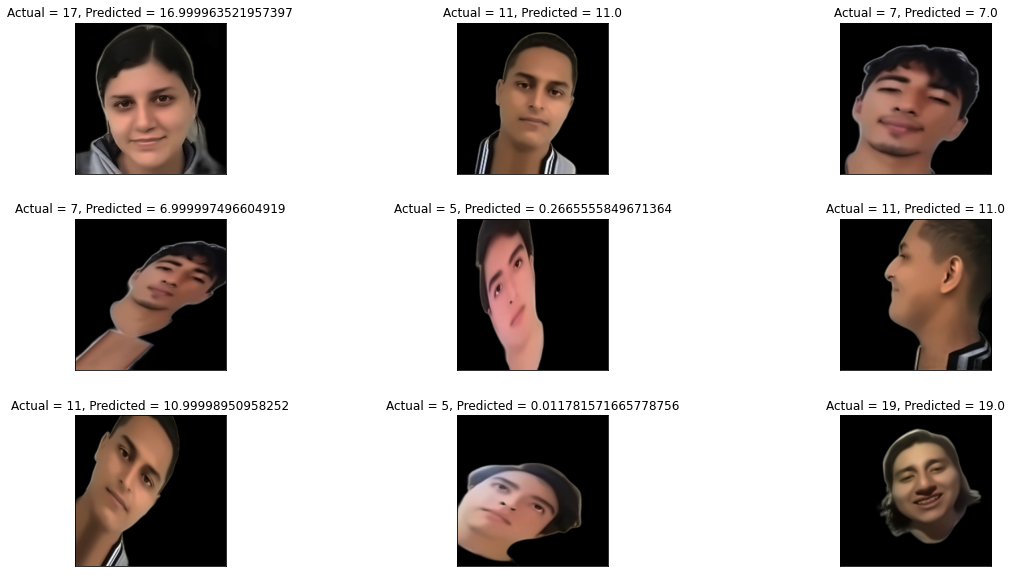

In [253]:
#Mestro de forma grafica como esta funcionando el modelo con su prediccion aproximada
plt.figure(1 , figsize = (19 , 10))
n = 0 

for i in range(9):
    n += 1 
    r = np.random.randint( 0, test_ds.shape[0], 1)
    
    plt.subplot(3, 3, n)
    plt.subplots_adjust(hspace = 0.3, wspace = 0.3)
    
    plt.imshow(test_ds[r[0]])
    plt.title('Actual = {}, Predicted = {}'.format(test_labels[r[0]] , test_labels[r[0]]*pred[r[0]][test_labels[r[0]]]) )
    plt.xticks([]) , plt.yticks([])

plt.show()

In [250]:

converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()
with open("modelvini5.tflite", 'wb') as f:
  f.write(tflite_model)


INFO:tensorflow:Assets written to: C:\Users\VINICI~1\AppData\Local\Temp\tmpqdn00qzt\assets


INFO:tensorflow:Assets written to: C:\Users\VINICI~1\AppData\Local\Temp\tmpqdn00qzt\assets
